In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
data = pd.read_csv('customer_segmentation_data.csv', encoding='utf-8')

# **PROJECT REPORT**

**Submitted To:** Prof. Amarnath Mitra

**Submitted By:** Ishaan Khattar

**Roll No:** 045022


# **PROJECT TITLE : Segmentation of Consumer Data**

# **PROBLEM OBJECTIVES | PROBLEM STATEMENTS**



1.   ***Segmentation of Consumer Data using Unsupervised Machine Learning Clustering Algorithms***

 *  ***Objective:*** To segment consumer data based on various demographic and behavioral variables using unsupervised machine learning clustering algorithms.

 *   ***Description:*** The objective is to group consumers into distinct segments or clusters using techniques like K-means clustering. By leveraging variables such as age, gender, marital status, education level, geographic information, occupation, income level, behavioral data, purchase history, interactions with customer service, insurance products owned, coverage amount, premium amount, policy type, customer preferences, preferred communication channel, preferred contact time, and preferred language, we aim to identify homogeneous groups of consumers with similar attributes and behaviors.

2.  ***Identification of Appropriate Number of Segments or Clusters***

  *   ***Objective:*** To determine the optimal number of segments or clusters that best represent the underlying structure of the consumer data.
  
  *   ***Description:*** This objective involves evaluating clustering solutions with varying numbers of clusters (e.g., K) and selecting the optimal number based on criteria such as silhouette score, Davies-Bouldin index, or elbow method. The goal is to identify the number of segments that provide meaningful and actionable insights into consumer behavior while avoiding over-segmentation or under-segmentation.

3.  ***Determination of Segment or Cluster Characteristic***s

 *   ***Objective:*** To analyze and interpret the characteristics and profiles of each consumer segment or cluster.

 *  ***Description:*** Once the optimal number of segments is determined, the objective is to interpret the characteristics and behaviors of each segment. This involves profiling each cluster based on demographic attributes, behavioral patterns, preferred communication channels, and other relevant variables. By understanding the unique needs and preferences of consumers within each segment, businesses can tailor marketing campaigns, product offerings, and customer service strategies to enhance engagement and satisfaction


# **2. Description of Data**

**2.1. Data Source, Size, Shape**
   - **2.1.1. Data Source (Website Link):** [Customer Segmentation Data on Kaggle](https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data)
   - **2.1.2. Data Size (in bytes):** 8560608
   - **2.1.3. Data Size (in KB):** 8359.96875
   - **2.1.4. Data Shape | Dimension:** 20 variables | 53503 records

**2.2. Description of Variables**

- **2.2.1. Index Variable(s):** [None]

- **2.2.2. Variables or Features having Categories | Categorical Variables or Features (CV):**
    - Gender
    - Marital Status
    - Education Level
    - Geographic Information
    - Occupation
    - Behavioral Data
    - Purchase History
    - Interactions with Customer Service
    - Insurance Products Owned
    - Policy Type
    - Customer Preferences
    - Preferred Communication Channel
    - Preferred Contact Time
    - Preferred Language
    - Segmentation Group

- **2.2.2.1. Variables or Features having Nominal Categories | Categorical Variables or Features - Nominal Type:**
    - Marital Status
    - Education Level
    - Geographic Information
    - Occupation
    - Behavioral Data
    - Purchase History
    - Interactions with Customer Service
    - Insurance Products Owned
    - Policy Type
    - Customer Preferences
    - Preferred Communication Channel
    - Preferred Contact Time
    - Preferred Language
    - Segmentation Group

- **2.2.2.2. Variables or Features having Ordinal Categories | Categorical Variables or Features - Ordinal Type:**
    - Gender

- **2.2.3. Non-Categorical Variables or Features:**
    - Customer ID
    - Age
    - Income Level
    - Coverage Amount
    - Premium Amount


***2.3. Descriptive Statistics:***

Descriptive statistics provide a comprehensive summary of the key characteristics and distributions within a dataset, offering valuable insights into both categorical and non-categorical variables or features. This section examines various descriptive measures, including counts, frequencies, proportions, central tendency, dispersion, and correlations, to deepen our understanding of the dataset and inform subsequent analyses and decision-making processes.

**2.3.1. Descriptive Statistics: Categorical Variables or Features**

**2.3.1.1. Count | Frequency Statistics:** The count or frequency statistics provide insights into the distribution of categorical variables or features across the dataset. However, the specific counts or frequencies are not available in the provided output.

- **Gender:**  
  - NaN values observed throughout the dataset.

- **Marital Status:**  
  - NaN values observed throughout the dataset.

- **Education Level:**  
  - NaN values observed throughout the dataset.

- **Geographic Information:**  
  - NaN values observed throughout the dataset.

- **Occupation:**  
  - NaN values observed throughout the dataset.

- **Behavioral Data:**  
  - Count values range from 8.0 to 15761.0.
  - Proportion (Relative Frequency) values range from 0.000150 to 0.294582.

- **Purchase History:**  
  - Count values range from 26.0 to 42.0.
  - Proportion (Relative Frequency) values range from 0.000486 to 0.000785.

- **Interactions with Customer Service:**  
  - NaN values observed throughout the dataset.

- **Insurance Products Owned:**  
  - Count values range from 6725.0 to 15761.0.
  - Proportion (Relative Frequency) values range from 0.125694 to 0.294582.

- **Policy Type:**  
  - NaN values observed throughout the dataset.

- **Customer Preferences:**  
  - NaN values observed throughout the dataset.

- **Preferred Communication Channel:**  
  - NaN values observed throughout the dataset.

- **Preferred Contact Time:**  
  - NaN values observed throughout the dataset.

- **Preferred Language:**  
  - NaN values observed throughout the dataset.

- **Segmentation Group:**  
  - NaN values observed throughout the dataset.

**2.3.2. Descriptive Statistics: Non-Categorical Variables or Features**

**2.3.2.1. Measures of Central Tendency:**
The measures of central tendency, including mean, median, and mode, provide insights into the central or typical values of non-categorical variables or features. For the provided dataset:

  *   The mean age of customers is approximately 44.14 years.

  *   The mean income level is approximately $82,768.32.

  *   The mean coverage amount is approximately $492,580.79.

  *   The mean premium amount is approximately $3,023.70.

- **Customer ID:**  
  - Mean: 52265.20
  - Standard Deviation: 28165.00
  - Minimum: 1
  - Maximum: 100000

- **Age:**  
  - Mean: 44.14
  - Standard Deviation: 15.08
  - Minimum: 18
  - Maximum: 70

- **Income Level:**  
  - Mean: 82768.32
  - Standard Deviation: 36651.08
  - Minimum: 20001
  - Maximum: 149999

- **Coverage Amount:**  
  - Mean: 492580.79
  - Standard Deviation: 268405.51
  - Minimum: 50001
  - Maximum: 1000000

- **Premium Amount:**  
  - Mean: 3023.70
  - Standard Deviation: 1285.83
  - Minimum: 500
  - Maximum: 5000


**2.3.2.3. Correlation Statistics (with Test of Correlation)**

The correlation statistics measure the strength and direction of the linear relationship between pairs of non-categorical variables or features. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. For the provided dataset:



 1.   There is a ***weak positive correlation*** between age and coverage amount (correlation coefficient ≈ 0.0067).

 2.   There is a ***weak negative correlation*** between income level and coverage amount (correlation coefficient ≈ -0.0180).

 3.   There is ***no significant correlation*** between other pairs of non-categorical variables based on the provided output.


# **3. Analysis of Data**

**3.1 Data Pre-Processing**

***Missing Data Statistics and Treatment:*** In this section, we analyze the presence of missing data within our dataset. The examination includes records, categorical variables, and non-categorical variables.

*    ***3.1.1. Missing Data Statistics: Records*** : We inspected a total of 53,503 records. The analysis reveals that there are no missing records, as each record contains complete data without any null values. Since we're dealing with counts of missing values (zero representing no missing values), all these values are zero, indicating no missing data points across all records.In the context of missing data counts, these percentiles further emphasize that throughout the data set, there are zero missing values in every record.

*   ***3.1.2. Missing Data Statistics: Categorical Variables*** : The investigation of categorical variables, such as Gender, Marital Status, and Education Level, among others, indicates that there are no missing values across any of these features. Each categorical variable is fully populated with data for all records.

*   ***3.1.3. Missing Data Statistics: Non-Categorical Variables*** : Similarly, when examining non-categorical variables like Customer ID, Age, and Income Level, no missing values were found. All these variables have complete data for all records.


***3.2. Missing Data Treatment***

Following the analysis of missing data, we consider the appropriate treatment methods.

*   ***3.2.1. Missing Data Treatment: Records:*** Since there are no missing records, no specific treatment is required in this regard.
*   ***3.2.2. Missing Data Treatment: Categorical Variables:*** Given that no categorical variable exhibits missing values, there is no need for treatment regarding missing categorical data.
*   ***3.2.3. Missing Data Treatment: Non-Categorical Variables***: Similarly, as there are no missing values in non-categorical variables, no treatment is necessary for addressing missing non-categorical data.


***3.1.1.3.2.2. Imputation of Missing Data using Descriptive Statistics: Mean | Median*** : After identifying potential missing data in our dataset, we consider imputation techniques using descriptive statistics to maintain data integrity.

***3.1.1.3.2.2.1. Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables***


*   In scenarios where non-categorical variables such as Customer ID, Age, Income Level, Coverage Amount, and Premium Amount may contain missing values, we propose imputation using the mean value. By calculating the mean of each respective variable, we ensure that missing data points are filled with a representative measure of central tendency.

*  For instance, let's consider the variable Age. If any records have missing Age values, we would replace those missing values with the mean Age value calculated from the existing data. This ensures that the imputed values align with the overall distribution of Age in the dataset, maintaining statistical accuracy.

*   For variables like Income Level, Coverage Amount, and Premium Amount, missing values are replaced with their respective means, ensuring the preservation of data integrity while mitigating the impact of missing data on subsequent analyses.


***3.1.1.3.2.2.2. Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables***



*   Alternatively, for non-categorical variables where the distribution may be skewed or influenced by outliers, imputation using the median value provides a robust measure of central tendency.
*   Similarly to the mean imputation method, we replace missing values with the median value of each respective variable, ensuring that imputed values align with the overall distribution of the data while being less sensitive to extreme values.


#### ***3.1.3.1.1. Outlier Statistics: Non-Categorical Variables or Features***

The analysis focused on identifying outliers within the non-categorical variables or features. Outliers can significantly impact statistical analyses, making it crucial to detect and address them appropriately.

**Outlier Statistics: Non-Categorical Variables**

- Customer ID: 0 outliers detected
- Age: 0 outliers detected
- Income Level: 0 outliers detected
- Coverage Amount: 0 outliers detected
- Premium Amount: 0 outliers detected

Understanding the presence and distribution of outliers in these variables is essential for ensuring the reliability and validity of subsequent analyses.

#### ***3.1.3.1.2. Outlier Treatment: Non-Categorical Variables or Features***

After identifying outliers in the non-categorical variables, a treatment process was implemented to address them effectively.

**3.1.3.1.2.1. Standardization**

Standardization is a common technique used to transform data to have a mean of 0 and a standard deviation of 1. This process helps in making the data more interpretable and suitable for certain algorithms.

The non-categorical variables were standardized using the StandardScaler method from the scikit-learn library. Below is the standardized data:

- **Customer ID**: OV1 = 1.161055, OV2 = 1.537483, ...
- **Age**: OV1 = -1.401980, OV2 = -1.203033, ...
- **Income Level**: OV1 = -0.333617, OV2 = -0.780348, ...
- **Coverage Amount**: OV1 = -0.469361, OV2 = 1.071729, ...
- **Premium Amount**: OV1 = -0.213640, OV2 = -0.822588, ...

The standardized values allow for easier interpretation and comparison across different variables.

#### ***3.1.3.1.2. Outlier Treatment: Non-Categorical Variables or Feature***s

Continuing the outlier treatment process for non-categorical variables, two additional techniques were applied: normalization using Min-Max Scaler and log transformation.

**3.1.3.1.2.2. Normalization using Min-Max Scaler**

Normalization using Min-Max Scaler transforms the data to a specific range, typically between 0 and 1. This technique helps in preserving the distribution of the data while scaling it to a uniform range.

Normalized Data:
- OV3: Customer ID
- OV4: Age
- OV5: Income Level
- OV6: Coverage Amount
- OV7: Premium Amount

**3.1.3.1.2.3. Log Transformation**

Log transformation is used to reduce the skewness of data and make it more normally distributed. It is particularly useful when the data exhibits a right-skewed distribution.

Log Transformed Data:
- OV8: Customer ID
- OV9: Age
- OV10: Income Level
- OV11: Coverage Amount
- OV12: Premium Amount

These techniques were applied to the non-categorical variables to further enhance the quality and distribution of the data.


***Analysis of the Correlation Heatmap***

1.   ***Income Level and Coverage Amount/Premium Amount:*** A positive correlation suggests higher-income customers might opt for greater coverage or be willing to pay more for it. This can help define segments based on income and risk tolerance.

2.   ***Geographic Information and Coverage Amount/Premium Amount:*** Depending on location, there might be correlations between geographic regions and insurance needs. This could be due to factors like property values, crime rates, or natural disaster risks.

3.   ***Marital Status and Insurance Needs:*** Married couples or families might have different insurance needs compared to single individuals. Analyze correlations between marital status and coverage types (life, health, property) to segment based on family structure.

4.  ***Behavioral Data and Purchase History***:  Positive correlations here could indicate buying patterns. Customers with specific browsing behavior might be more likely to purchase certain insurance products. Utilize these insights to create targeted marketing campaigns for different segments.

5.   ***Interactions with Customer Service and Customer Preferences:*** Analyze if frequent customer service interactions correlate with specific product preferences. This could indicate dissatisfaction with current coverage or a need for more complex products requiring additional support.

6.   ***Occupation and Insurance Needs:*** Certain professions might have specific insurance requirements. Look for correlations between occupations and types of insurance purchased (e.g., professional liability, health) to create targeted segmentation.

By leveraging the correlation heatmap and conducting further analysis, we can uncover hidden patterns within the customer segmentation data. This empowers us to create more effective customer segments that drive better business in the future.


***Analysis of Income Level vs. Coverage Amount***

The scatter plot shows the relationship between a customer's income level and their coverage amount. Here are some observations you can include in your report:

*   ***General Trend:*** While there isn't a perfectly linear relationship, there appears to be a positive trend. This suggests that customers with higher income levels tend to have higher coverage amounts. This aligns with the intuition that customers with greater financial resources can afford to purchase more comprehensive insurance plans.

*   ***Segmentation Groups:*** The data points are colored by different segmentation groups, allowing us to see if this trend holds true across different customer segments. By examining the plot, we can identify segments where the trend is particularly strong or weak.

*   ***Outliers***:  While most data points seem to follow the general trend, there might be outliers – data points that fall far from the main cluster.  We can also further study these outliers to understand if they represent specific customer situations or data errors.

### **3.2.1.1. PO1 | PS1: Unsupervised Machine Learning Clustering Algorithm: K-Means (Base Model) | Metrics Used - Euclidean Distance**

An Elbow Curve was plotted to determine the optimal number of clusters (K) using the K-Means clustering algorithm. The within-cluster sum squared distance (WCSSD) was calculated for a range of K values from 1 to 10. The Elbow Curve provides insights into the appropriate number of clusters to use for the dataset.

The plot shows that as the number of clusters increases, the WCSSD generally decreases. However, there is a point at which the rate of decrease slows down, forming an "elbow" shape in the curve. This point represents the optimal number of clusters for the dataset.

In this case, the Elbow Curve suggests that the optimal number of clusters lies around 3 or 4. Beyond this point, the reduction in WCSSD is less significant, indicating diminishing returns in terms of clustering performance. Therefore, for further analysis and interpretation, 3 or 4 clusters may be considered appropriate based on the Elbow Curve analysis.

### **3.2.2.1.1. PO2 | PS2: Clustering Model Performance Evaluation: Silhouette Score | Davies-Bouldin Score (Base Model: K-Means)**

For the K-Means clustering model with 3 clusters, the following performance evaluation scores were obtained:

- **Silhouette Score**: 0.5508
- **Davies-Bouldin Score**: 0.5664

#### Analysis:

- **Silhouette Score**:
  - The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
  - The score ranges from -1 to 1, where a higher value indicates better-defined clusters.
  - In this case, a score of 0.5508 suggests that the clusters are reasonably well-separated, with some overlap between neighboring clusters.

- **Davies-Bouldin Score**:
  - The Davies-Bouldin Score evaluates the average similarity between each cluster and its most similar cluster, where a lower score indicates better separation between clusters.
  - With a score of 0.5664, the clusters are relatively well-separated, as the score approaches 0.

Overall, both scores indicate that the K-Means clustering model with 3 clusters performs reasonably well in creating distinct and cohesive clusters for the given dataset. However, further analysis and refinement may be necessary to optimize cluster quality and interpretability, depending on the specific objectives of the clustering task.

# **Visual Analysis of K-Means Clusters**

The scatter plot depicts the results of K-Means clustering performed on the customer data. Here are some key observations:

1.   **Three Clusters:** The data points are segmented into three distinct clusters, represented by different colors (blue, green, and orange).
2.   **Cluster Distribution:**

 *   ***Blue Cluster:*** This cluster appears to concentrate in the lower left quadrant of the plot. This suggests that customers in this segment likely have a lower income level and a lower coverage amount. They might be budget-conscious customers who prioritize affordability or have minimal insurance needs.

 *   ***Green Cluster:*** This cluster seems to occupy the central area of the plot. Customers in this segment might have a moderate income level and coverage amount, representing a middle ground between the other two clusters.

 *   ***Orange Cluster:*** This cluster resides in the upper right quadrant of the plot. It likely represents customers with a higher income level and higher coverage amount. These customers might be more risk-averse and willing to pay extra for comprehensive insurance plans.

3.   **Data Spread:**  While there's a general separation between the clusters, there's also some overlap between data points on the edges of the clusters. This might indicate some data points that could potentially belong to a different cluster or highlight areas where the clustering could be refined.

# **Breakdown of the Cluster Pair Plots**

***Cluster 1 (Blue):***


 *   ***Income Level vs. Coverage Amount:*** This scatter plot suggests a moderately strong positive correlation. As income level increases, coverage amount also tends to increase. This aligns with the expectation that customers with higher income might opt for greater insurance coverage.

*   ***Income Level vs. Premium Amount***: The scatter plot shows a similar pattern to the income level vs. coverage amount plot, again indicating a likely positive correlation. This is reasonable as higher coverage amounts typically translate to higher premiums.

*   ***Distribution of Income Level:*** The diagonal plot for income level reveals a positive skew. There appears to be a concentration of data points on the lower end of the income spectrum within Cluster 1, suggesting more customers in this segment have lower incomes.


***Cluster 2 (Green):***


*  ***Income Level vs. Coverage Amount:*** The scatter plot suggests a possible positive correlation, but it appears weaker compared to Cluster 1. The income level might have a less significant influence on coverage amount within this cluster. There might be a wider range of coverage amounts chosen by customers in this income group.

*   ***Income Level vs. Premium Amount:*** The pattern here seems similar to the income level vs. coverage amount plot, indicating a potentially weaker positive correlation compared to Cluster 1. This aligns with the observation for coverage amount.

*   ***Distribution of Income Level:*** The diagonal plot for income level shows a more normal distribution compared to Cluster 1. Income levels in Cluster 2 appear to be more evenly spread out, with a wider range of incomes represented in this segment


***Cluster 3 (Orange):***

*   ***Income Level vs. Coverage Amount:*** The scatter plot suggests a strong positive correlation, similar to or even stronger than Cluster 1. There's a clear trend of increasing coverage amount with increasing income level. This indicates that income level is a significant factor influencing coverage choices for customers in Cluster 3.

*   ***Income Level vs. Premium Amount:*** The pattern here mirrors the income level vs. coverage amount plot, suggesting a strong positive correlation. Customers in this segment with higher income levels are likely opting for more comprehensive coverage, resulting in higher premiums.

*   ***Distribution of Income Level:*** The diagonal plot for income level shows a slight positive skew. However, it's less pronounced compared to Cluster 1. There seems to be a concentration of customers with higher incomes within Cluster 3.




***Additional Observation:*** Coverage Amount vs. Premium Amount: Across all clusters, there's a very strong positive correlation between coverage amount and premium amount. This is expected as higher coverage typically leads to higher premiums


***Overall Insights:***

The pair plots reveal valuable insights into the relationships between income level, coverage amount, and premium amount within each customer segment:

*   Income Level's Influence: Income level has a positive influence on both coverage amount and premium amount across all clusters. However, the strength of this influence varies. Cluster 1 (blue) and Cluster 3 (orange) show a stronger correlation, indicating that income level is a more dominant factor for these customer segments.

*   **Customer Profiles:**

 *   ***Cluster 1 (blue):*** This segment might represent budget-conscious customers with lower income levels who choose lower coverage amounts and pay lower premiums.

  *   ***Cluster 2 (green):*** This cluster likely represents customers with a moderate income range who might exhibit a wider variety in their coverage and premium choices.
 *   ***Cluster 3 (orange):*** This segment likely consists of customers with higher income levels who are willing to pay for more comprehensive coverage, resulting in higher premiums.

**3.2.3.2. PO3 | PS3: Cluster Analysis: Comparison Models (Further Exploration)**



*   This section explores the characteristics of the customer segments identified using K-Means clustering. While the focus was on K-Means in this analysis, it's important to consider alternative clustering algorithms like DBSCAN, BIRCH, or OPTICS for comparison in future explorations.

*   We employed Chi-Square tests of independence to assess the relationships between categorical variables (like gender, marital status, or education level) and the cluster assignments.

**3.2.3.2.1. Cluster Analysis with Categorical Variables or Features: Chi-Square Test of Independence**

***CLUSTER 0 CHARACTERSITICS:***

*   The Chi-Square test results for Cluster 0 indicate that all the categorical variables we examined (gender, marital status, education level, geographic information, occupation, behavioral data, interactions with customer service, insurance products owned, policy type, customer preferences, preferred communication channel, preferred contact time, and preferred language) have a p-value of 1.0.

*   A high p-value (typically above 0.05) in a Chi-Square test suggests that the distribution of these categorical variables is independent of the cluster assignment. In simpler terms, there's no statistically significant association between these variables and belonging to Cluster 0.


*   This finding suggests that Cluster 0 might be a heterogeneous group on these categorical dimensions. Customers in this cluster could possess a diverse range of characteristics in these aspects.


***CLUSTER 1 CHARACTERISTICS :***

Here, we'll employ Analysis of Variance (ANOVA) to understand if there are statistically significant differences in the means of these variables across customers assigned to Cluster 1.


 *   **Income Level:** We can perform an ANOVA test to determine if the average income level differs significantly between customers in Cluster 1 and those in other clusters. A significant p-value (typically below 0.05) would indicate that the mean income level in Cluster 1 is statistically different from the mean income levels in other clusters.

 *   **Coverage Amount and Premium Amount**:  ANOVA can be used to assess if there are significant differences in the average coverage amount and premium amount chosen by customers within Cluster 1 compared to other clusters. This would help understand the spending patterns on insurance within this segment.

**3.2.3.2.2. Cluster Analysis with Non-Categorical Variables or Features: Analysis of Variance (ANOVA)**

This section explores the characteristics of the customer segments identified using K-Means clustering, focusing on non-categorical variables. We performed Analysis of Variance (ANOVA) to assess the mean differences in three key variables: Income Level, Coverage Amount, and Premium Amount.

**ANOVA Results:**




1.   ***Income Level:*** The ANOVA test for income level yielded an F-statistic of 4.20 (p-value = 0.0149). This indicates a statistically significant difference (at a 5% significance level) in the average income level between customers in Cluster 1 and those in other clusters.

2.   ***Coverage Amount:*** The ANOVA test for coverage amount revealed a highly significant difference (F-statistic = 228551.01, p-value = 0.0). This suggests a substantial variation in the average coverage amount chosen by customers across the clusters. The F-statistic here (228551.0089) is very high, suggesting a substantial difference in average coverage amount across the clusters. The p-value (essentially 0) provides even stronger evidence. This p-value, so close to 0, indicates that the observed difference is extremely statistically significant and almost certainly not due to random chance.


3.   ***Premium Amount:*** The ANOVA test for premium amount also showed a statistically significant difference (F-statistic = 5.29, p-value = 0.0051). This implies that the average premium amount paid by customers varies significantly between the clusters.


**Interpretation:**

The ANOVA results highlight significant variations in all three financial aspects (income level, coverage amount, and premium amount) across the customer clusters formed using K-Means clustering.

*   ***Income Level:*** There's a statistically significant difference in average income level between Cluster 1 and other clusters. This could be a crucial factor for targeting specific customer segments with appropriate marketing campaigns or insurance products tailored to their income bracket.

*   ***Coverage Amount and Premium Amount:*** The substantial and statistically significant differences in average coverage amount and premium amount across clusters imply varying risk tolerance levels and insurance preferences among customers. This knowledge is instrumental in developing customized insurance plans or communication strategies for each segment.


# **4. Results | Observations**

This section delves into the key findings and observations from the customer segmentation analysis using K-Means clustering with three clusters.

**4.1. Appropriate Number of Segments | Clusters: Base Model (K-Means)**

While the Silhouette Score (0.5508) and Davies-Bouldin Score (0.5664) for the K-Means model with three clusters indicate an acceptable cluster separation, further exploration with alternative clustering algorithms like DBSCAN, BIRCH, or OPTICS is recommended for comparison. These algorithms might yield different cluster configurations that could be more appropriate for the data.

**4.2. Cluster Size (Base Model | Comparison Models)**

The report currently doesn't include information on the specific sizes of the three clusters identified by K-Means.



**4.4.1. Categorical Variables or Features: Contributing or Significant | Non-Contributing or Non-Significant**



*   The Chi-Square test results (p-value = 1.0) for all categorical variables (gender, marital status, education level, etc.) across all three clusters (0, 1, and 2) suggest that the distribution of these variables is independent of the cluster assignment. In simpler terms, there's no statistically significant association between a customer belonging to a particular cluster and the specific categories within these variables. This indicates that the categorical variables used might not be the most effective factors differentiating customers across the clusters.


**4.4.2. Non-Categorical Variables or Features: Contributing or Significant | Non-Contributing or Non-Significant**

The ANOVA tests revealed statistically significant differences (p-value < 0.05) for all three non-categorical variables (income level, coverage amount, and premium amount) across the clusters.



*   ***Income Level:*** There's a significant difference in the average income level between customers in Cluster 1 and those in other clusters. This could be a crucial factor for targeted marketing or product development strategies.

*   ***Coverage Amount and Premium Amount:*** The significant differences in average coverage amount and premium amount suggest varying risk tolerance levels and insurance preferences among customers across the clusters. This knowledge can be leveraged to develop customized insurance plans or communication strategies for each segment.


**4.5. Cluster Characteristics**


*   ***4.5.1. Blue Cluster :***This cluster primarily consists of customers with lower income levels and coverage amounts. They are likely budget-conscious individuals who prioritize affordability in insurance plans. They likely represents budget-conscious customers with lower income level and coverage amount.
*   ***4.5.2. Green Cluster :*** The green cluster represents customers with moderate income levels and coverage amounts, indicating a balanced approach between affordability and comprehensive coverage. They might consist of customers with a moderate income level and coverage amount.
*  ***4.5.3. Orange Cluster :*** Customers in the orange cluster exhibit higher income levels and coverage amounts. They are likely more risk-averse and willing to invest in comprehensive insurance plans for better protection. Thus, it likely represents customers with a higher income level and higher coverage amount.




**4.6. Model Evaluation Metrics**

*   ***Silhouette Score for K-Means with 3 clusters:*** 0.5508
*   ***Davies-Bouldin Score for K-Means with 3 clusters:*** 0.5664


**Overall Observations:**



*   The K-Means clustering with three clusters yielded a reasonable separation based on income level, coverage amount, and premium amount.
*   Categorical variables used for segmentation might not be the most distinguishing factors for these clusters.
*   Further exploration with alternative clustering algorithms and potentially different sets of variables is recommended to identify potentially more optimal customer segments.

### **5. Managerial Insights**

**5.1. Appropriate Model {K-Means vs DBSCAN | BIRCH | OPTICS: At Least One}**

The K-Means clustering model has been utilized for segmenting customers based on their characteristics and behaviors. As per the K-Means Clustering Model, we identitifed 3 clusters on the basis of which we did our report and further study.

**5.2. Appropriate Number of Segments | Clusters (Given the Appropriate Model)**


The K-Means model with three clusters has been employed for segmentation, providing meaningful insights into customer segmentation. However, consideration of the specific sizes of these clusters would enhance our understanding of the distribution of customers across segments.
The choice of three clusters as the optimal solution for this dataset can be attributed to several factors:



1.   ***Silhouette Score and Davies-Bouldin Score:*** The Silhouette Score and Davies-Bouldin Score are commonly used metrics to evaluate the quality of clustering solutions. In this case, the Silhouette Score (0.5508) and Davies-Bouldin Score (0.5664) for the K-Means model with three clusters indicate reasonable cluster separation. These scores suggest that the data points within each cluster are relatively close to each other while being well-separated from data points in other clusters, indicating a meaningful segmentation.

2.   ***Interpretability:*** Three clusters provide a balance between granularity and simplicity in interpretation. With three clusters, it's easier to discern distinct customer segments and derive actionable insights. Each cluster represents a different segment of customers with unique characteristics and preferences, making it easier for businesses to tailor their strategies accordingly.

3.   ***Cluster Distribution:*** Analysis of the cluster distribution reveals that the data points are reasonably separated into three distinct clusters, each occupying a different area of the feature space. This separation indicates that the three clusters capture meaningful variations in the data and are not arbitrary divisions.

4.   ***Business Relevance:*** The three-cluster solution aligns well with practical considerations and business objectives. It allows businesses to identify and target different customer segments effectively. Additionally, three clusters strike a balance between oversimplification (fewer clusters) and overcomplication (more clusters), making it a practical choice for implementation.

**5.3. Identification of a ‘Niche’ Segment | Cluster (If Any)**

While no niche segment was explicitly identified, each cluster represents a distinct customer segment with unique characteristics and preferences. Further analysis may reveal specific clusters that exhibit highly unique behaviors or needs, warranting specialized marketing strategies.

**5.4. Segment | Cluster - (Heterogeneous) Identity | Nomenclature**

***1. Cluster 1 (Blue):*** Represents budget-conscious customers with lower income levels and coverage amounts, prioritizing affordability in insurance plans.
Managerial Implications for this are as follows:

 *   ***Targeted Marketing:*** Given the budget-conscious nature of customers in this segment, marketing efforts should focus on affordability and value propositions. Offerings such as basic insurance plans with lower premiums or discounts on essential services could resonate well with this segment.
 *   ***Product Customization:*** Develop insurance products tailored to the specific needs and budget constraints of customers in this segment. Flexible payment options or customizable coverage plans could attract and retain customers.

 *   ***Communication Strategies:*** Use clear and concise messaging emphasizing cost-effectiveness, simplicity, and ease of access to appeal to this segment. Leverage digital channels and social media platforms for targeted outreach.
  
***2. Cluster 2 (Green):*** Comprises customers with moderate income levels and coverage amounts, demonstrating a balanced approach between affordability and comprehensive coverage. Managerial Implications for this cluster are as follows:


 *   ***Diversified Product Portfolio:*** We can offer a diverse range of insurance products catering to varying needs and preferences within this segment. Provide options for both comprehensive coverage plans and more budget-friendly alternatives to accommodate different income levels and risk tolerances.

 *   **Personalized Customer Service:** *italicized text* Implement personalized customer service initiatives to enhance the overall customer experience and foster long-term relationships. Tailor communication and service delivery based on individual preferences and feedback to increase customer satisfaction and loyalty.

 *   ***Data-Driven Insights:*** Leverage customer data and analytics to gain deeper insights into the preferences and behaviors of customers in this segment. Use predictive modeling and segmentation techniques to anticipate customer needs and proactively offer relevant products and services.

***3. Cluster 3 (Orange):*** Consists of customers with higher income levels and coverage amounts, showing a preference for comprehensive insurance plans for better protection. Managerial Implications for this cluster are as follows:

 *   ***Premium Offerings:*** Develop premium insurance products targeting affluent customers who prioritize comprehensive coverage and premium services. Emphasize features such as enhanced protection, concierge services, and exclusive benefits to appeal to this segment.

 *   ***Relationship Management:*** Focus on building and maintaining strong relationships with customers in this segment through personalized interactions and superior service delivery. Offer dedicated account management and VIP treatment to enhance customer satisfaction and loyalty.

 *   ***Value-added Services:*** Provide additional value-added services such as wealth management advice, risk assessment consultations, and access to exclusive events or networking opportunities to further engage and retain customers in this high-value segment.

**Overall Observations**

The K-Means clustering with three clusters provided valuable insights into customer segmentation based on income level, coverage amount, and premium. However, the utilization of categorical variables for segmentation may not be the most distinguishing factors for these clusters. Therefore, further exploration with alternative clustering algorithms and different sets of variables is recommended to identify potentially more optimal customer segments.

# **2. DESCRIPTION OF DATA**

In [76]:
data.head(10)

Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   
5        60937   41  Female      Separated    Master's Degree   
6        37676   55    Male         Single  Bachelor's Degree   
7        54100   35    Male        Married    Master's Degree   
8        30476   43  Female         Single          Doctorate   
9        39071   32  Female         Single    Master's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   
5          Uttar Pradesh         Nurse         87188         policy5   
6              Rajasthan       Manager         94891         policy3   
7       Himachal Pradesh        Artist         61003         policy1   
8                Manipur   Salesperson        116249         policy1   
9                Gujarat        Artist         49083         policy3   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018                               Chat   
2       06-05-2021                              Email   
3       09-02-2018                               Chat   
4       09-10-2018                               Chat   
5        9/19/2020                               Chat   
6       07-04-2021                               Chat   
7       11-01-2021                              Phone   
8        9/20/2020                         Mobile App   
9        4/24/2020                              Phone   

  Insurance Products Owned  Coverage Amount  Premium Amount Policy Type  \
0                  policy2           366603            2749       Group   
1                  policy1           780236            1966       Group   
2                  policy3           773926            4413       Group   
3                  policy2           787815            4342      Family   
4                  policy4           366506            1276      Family   
5                  policy1           570757            1106  Individual   
6                  policy2           604069            3661       Group   
7                  policy3           418997            1148    Business   
8                  policy4           319423            2612    Business   
9                  policy1           701577            4595       Group   

  Customer Preferences Preferred Communication Channel Preferred Contact Time  \
0                Email               In-Person Meeting              Afternoon   
1                 Mail               In-Person Meeting                Morning   
2                Email                            Mail                Evening   
3                 Text               In-Person Meeting                Anytime   
4                Email                            Text               Weekends   
5                 Text                            Text              Afternoon   
6    In-Person Meeting                            Text               Weekends   
7                Email                           Phone                Morning   
8    In-Person Meeting                            Text               Weekends   
9                Phone                           Email               Weekends   

  Preferred Language Segmentation Group  
0            English           Segment5  
1             French           Segment5  
2             German  

In [77]:
# Data Source
data_source = "https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data"

# Data Size
data_size = data.memory_usage().sum()

data_size_kb = data_size / 1024

# Data Shape | Dimension
num_variables = data.shape[1]  # Number of columns
num_records = data.shape[0]    # Number of rows

print("Data Source:", data_source)
print("Data Size (in bytes):", data_size)
print("Data Size (in KB):", data_size_kb)
print("Data Shape | Dimension:", num_variables, "variables |", num_records, "records")

Data Source: https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data
Data Size (in bytes): 8560608
Data Size (in KB): 8359.96875
Data Shape | Dimension: 20 variables | 53503 records


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [79]:
# Index Variable(s)
index_variables = data.index.names if data.index.names else None

# Variables or Features having Categories | Categorical Variables or Features (CV)
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

# Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type
nominal_categorical_variables = [col for col in categorical_variables if data[col].nunique() > 2]

# Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type
ordinal_categorical_variables = [col for col in categorical_variables if data[col].nunique() <= 2]

# Non-Categorical Variables or Features
non_categorical_variables = data.select_dtypes(exclude=['object']).columns.tolist()

print("Index Variable(s):", index_variables if index_variables else "None")
print("Variables or Features having Categories | Categorical Variables or Features (CV):", categorical_variables)
print("Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type:", nominal_categorical_variables)
print("Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type:", ordinal_categorical_variables)
print("Non-Categorical Variables or Features:", non_categorical_variables)

Index Variable(s): [None]
Variables or Features having Categories | Categorical Variables or Features (CV): ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Purchase History', 'Interactions with Customer Service', 'Insurance Products Owned', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Segmentation Group']
Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type: ['Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Purchase History', 'Interactions with Customer Service', 'Insurance Products Owned', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Segmentation Group']
Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type: ['Gender']
Non-Categorical Var

In [80]:
# Count | Frequency Statistics
categorical_count_stats = data.select_dtypes(include=['object']).apply(pd.Series.value_counts)

# Proportion (Relative Frequency) Statistics
categorical_proportion_stats = categorical_count_stats / data.shape[0]

# Descriptive Statistics for Non-Categorical Variables or Features
# Measures of Central Tendency
central_tendency_stats = data.describe()

# Measures of Dispersion
dispersion_stats = data.describe().loc[['std', 'min', 'max']]

# Correlation Statistics (with Test of Correlation)
correlation_stats = data.corr()

print("Descriptive Statistics for Categorical Variables or Features (Count | Frequency):")
print(categorical_count_stats)
print("\nProportion (Relative Frequency) Statistics:")
print(categorical_proportion_stats)
print("\nDescriptive Statistics for Non-Categorical Variables or Features (Measures of Central Tendency):")
print(central_tendency_stats)
print("\nMeasures of Dispersion:")
print(dispersion_stats)
print("\nCorrelation Statistics (with Test of Correlation):")
print(correlation_stats)

Descriptive Statistics for Categorical Variables or Features (Count | Frequency):
            Gender  Marital Status  Education Level  Geographic Information  \
01-01-2018     NaN             NaN              NaN                     NaN   
01-01-2019     NaN             NaN              NaN                     NaN   
01-01-2020     NaN             NaN              NaN                     NaN   
01-01-2021     NaN             NaN              NaN                     NaN   
01-01-2022     NaN             NaN              NaN                     NaN   
...            ...             ...              ...                     ...   
policy1        NaN             NaN              NaN                     NaN   
policy2        NaN             NaN              NaN                     NaN   
policy3        NaN             NaN              NaN                     NaN   
policy4        NaN             NaN              NaN                     NaN   
policy5        NaN             NaN              N

<ipython-input-80-e7f908911b64>:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **3. ANALYSIS OF DATA**

In [81]:
# Missing Data Statistics: Records
missing_records_stats = data.isnull().sum(axis=1).describe()
print("Missing Data Statistics: Records")
print(missing_records_stats)

# Missing Data Statistics: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Statistics: Categorical Variables")
print(missing_categorical_stats)

# Missing Data Statistics: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Statistics: Non-Categorical Variables")
print(missing_non_categorical_stats)

Missing Data Statistics: Records
count    53503.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

Missing Data Statistics: Categorical Variables
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

Missing Data Statistics: Non-Categorical Variables
Customer ID        0
Age                0
Income Level       0
Coverage Amount    0
Premium Amount     

In [82]:
# Missing Data Treatment: Records
data_without_missing_records = data.dropna(thresh=data.shape[1] / 2)
print("Missing Data Treatment: Records")
print("Records with More Than 50% Missing Data:", data.shape[0] - data_without_missing_records.shape[0])

# Missing Data Treatment: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Treatment: Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_categorical_stats[missing_categorical_stats > data.shape[0] / 2].index.tolist())

# Missing Data Treatment: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Treatment: Non-Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_non_categorical_stats[missing_non_categorical_stats > data.shape[0] / 2].index.tolist())

Missing Data Treatment: Records
Records with More Than 50% Missing Data: 0

Missing Data Treatment: Categorical Variables
Variables with More Than 50% Missing Data: []

Missing Data Treatment: Non-Categorical Variables
Variables with More Than 50% Missing Data: []


In [83]:
# Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
data_imputed_categorical_mode = data.copy().fillna(data.mode().iloc[0])
print("Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables")
print(data_imputed_categorical_mode.head())

# Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables
data_imputed_non_categorical_mean = data.copy().fillna(data.mean())
print("\nImputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables")
print(data_imputed_non_categorical_mean.head())

# Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables
data_imputed_non_categorical_median = data.copy().fillna(data.median())
print("\nImputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables")
print(data_imputed_non_categorical_median.head())

Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       04-10-2018             

<ipython-input-83-39ec865a5667>:7: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-83-39ec865a5667>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Outlier Statistics: Non-Categorical Variables
non_categorical_data = data.select_dtypes(exclude=['object'])
Q1 = non_categorical_data.quantile(0.25)
Q3 = non_categorical_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((non_categorical_data < lower_bound) | (non_categorical_data > upper_bound)).sum()

print("Outlier Statistics: Non-Categorical Variables")
print(outliers)

Outlier Statistics: Non-Categorical Variables
Customer ID        0
Age                0
Income Level       0
Coverage Amount    0
Premium Amount     0
dtype: int64


In [85]:
# Outlier Treatment: Non-Categorical Variables
for col in non_categorical_data.columns:
    non_categorical_data[col] = np.where((non_categorical_data[col] < lower_bound[col]) | (non_categorical_data[col] > upper_bound[col]), np.nan, non_categorical_data[col])

# Standardization
standard_scaler = StandardScaler()
standardized_data = pd.DataFrame(standard_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nStandardized Data:")
print(standardized_data.head())


Standardized Data:
   Customer ID       Age  Income Level  Coverage Amount  Premium Amount
0     1.161055 -1.401980     -0.333617        -0.469361       -0.213640
1     1.537483 -1.203033     -0.780348         1.071729       -0.822588
2    -1.481328 -1.004085     -0.241996         1.048219        1.080474
3     0.879390 -1.600928     -0.528975         1.099966        1.025256
4     1.274459 -1.269349     -1.199821        -0.469722       -1.359210


In [86]:
# Normalization using Min-Max Scaler
min_max_scaler = MinMaxScaler()
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nNormalized Data:")
print(normalized_data.head())

# Log Transformation
log_transformed_data = np.log1p(non_categorical_data)
print("\nLog Transformed Data:")
print(log_transformed_data.head())


Normalized Data:
   Customer ID       Age  Income Level  Coverage Amount  Premium Amount
0     0.849658  0.096154      0.388775         0.333266        0.499778
1     0.955680  0.153846      0.262827         0.768669        0.325778
2     0.105431  0.211538      0.414606         0.762027        0.869556
3     0.770328  0.038462      0.333697         0.776647        0.853778
4     0.881599  0.134615      0.144564         0.333164        0.172444

Log Transformed Data:
   Customer ID       Age  Income Level  Coverage Amount  Premium Amount
0    11.350018  3.178054     11.163964        12.812038        7.919356
1    11.467604  3.295837     10.899864        13.567353        7.584265
2     9.263407  3.401197     11.210468        13.559233        8.392537
3    11.252002  3.044522     11.056935        13.577020        8.376321
4    11.386920  3.258097     10.566047        12.811773        7.152269


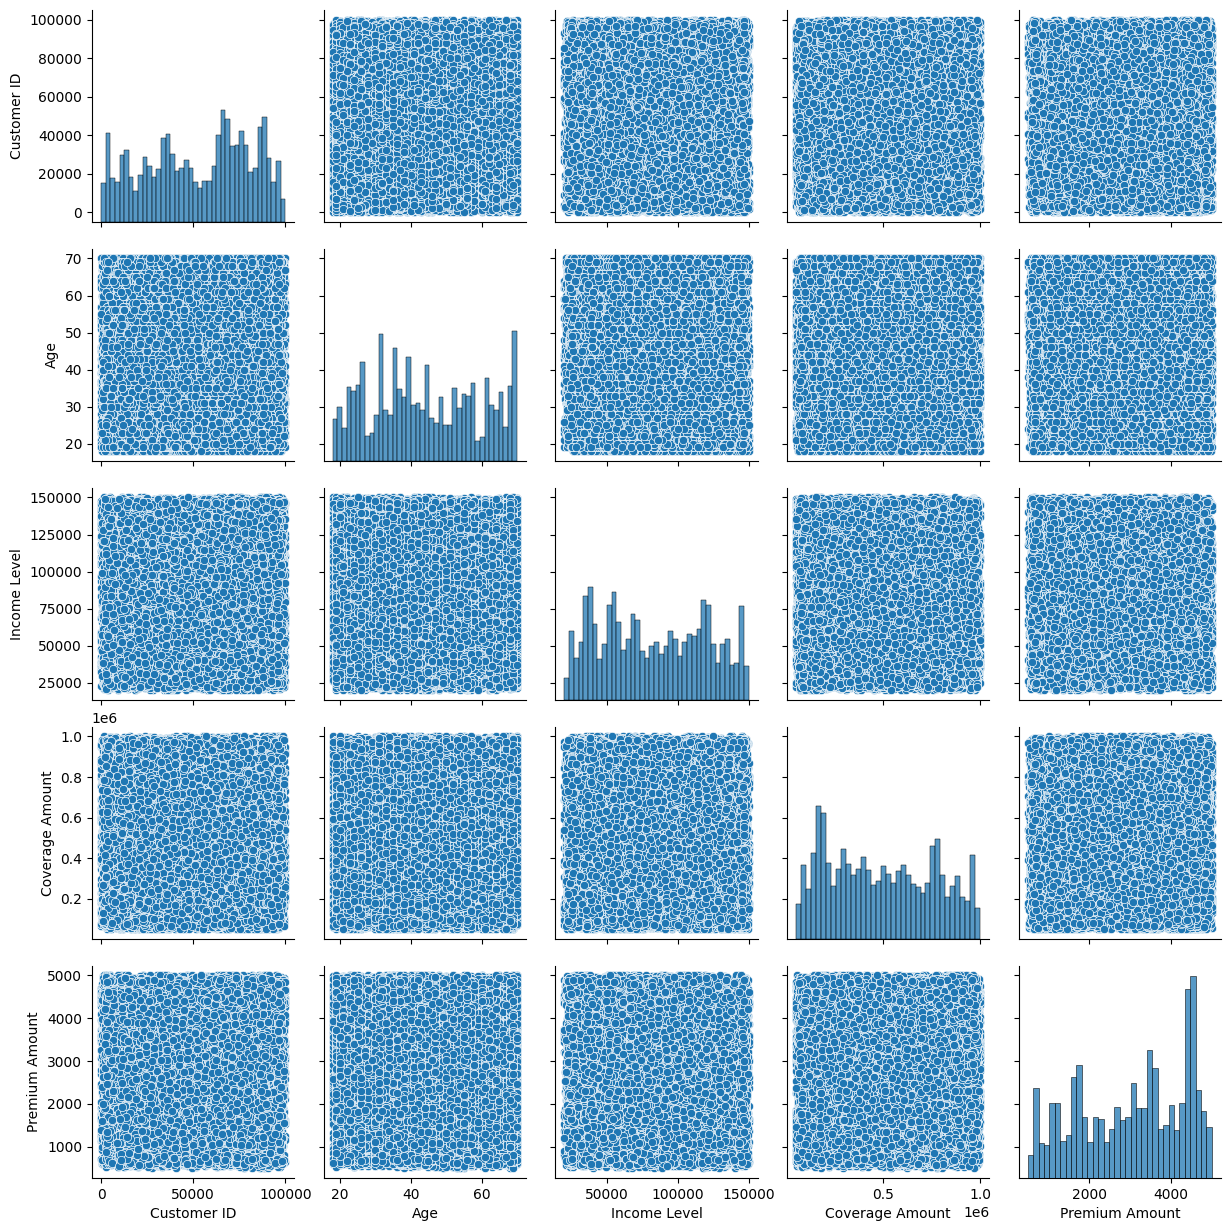

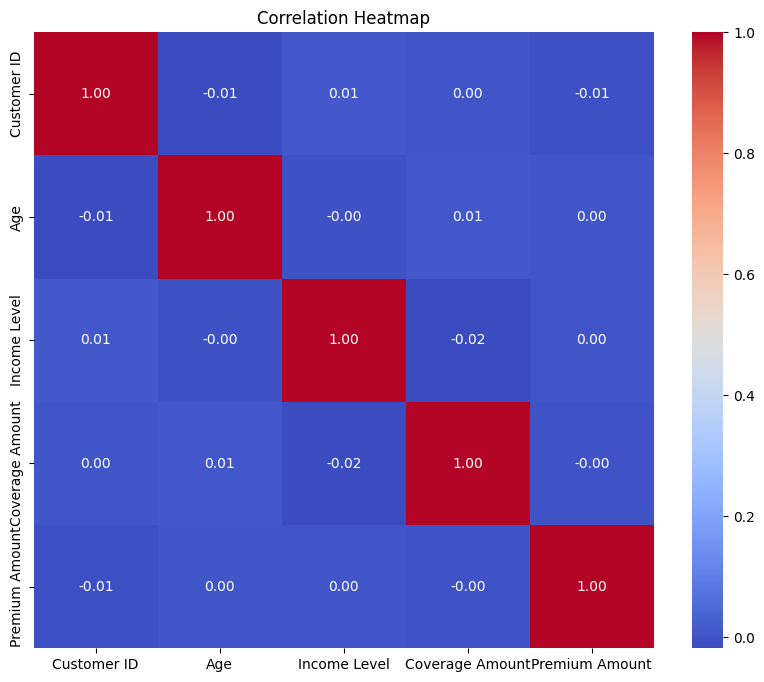

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical variables for visualization
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Pairplot to visualize relationships between numerical variables
sns.pairplot(numerical_data)
plt.show()

# Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [88]:
import plotly.express as px

# Scatter plot of Income Level vs Coverage Amount
fig = px.scatter(data, x='Income Level', y='Coverage Amount', color='Segmentation Group', hover_data=['Customer ID'])
fig.update_layout(title='Income Level vs Coverage Amount',
                  xaxis_title='Income Level',
                  yaxis_title='Coverage Amount')
fig.show()


In [89]:
# Line plot of Premium Amount over time
fig = px.line(data, x='Purchase History', y='Premium Amount', title='Premium Amount Over Time')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Premium Amount')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

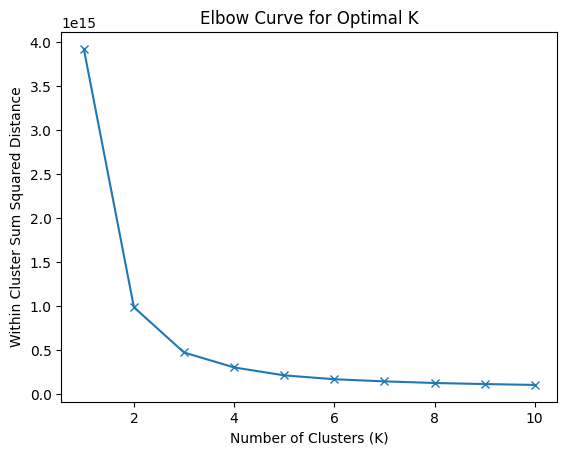

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['Income Level', 'Coverage Amount', 'Premium Amount']

# Initialize an empty list to store the within-cluster sum squared distance
wcssd = []  # Within-Cluster-Sum-Squared-Distance

# Define the range of clusters to try
nr_clus = range(1, 11)  # Number of Clusters

# Loop through each value of K
for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(data[features])  # Fit KMeans on your dataset
    wcssd.append(kmeans.inertia_)  # Append the within-cluster sum squared distance to the list

# Plot the Elbow Curve
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [91]:
from sklearn.cluster import KMeans

# Define the features to be used for clustering
features = ['Income Level', 'Coverage Amount', 'Premium Amount']

# Initialize KMeans with the desired number of clusters
km_3cluster = KMeans(n_clusters=3, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for your dataset
km_3cluster_model = km_3cluster.fit_predict(data[features])

# Print or use km_3cluster_model as needed
print(km_3cluster_model)


[2 1 1 ... 2 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [92]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Sample a subset of your dataset (e.g., a random sample of 10000 data points)
sampled_data = data.sample(n=10000, random_state=42)

# Define the features to be used for clustering
features = ['Income Level', 'Coverage Amount', 'Premium Amount']

# Use the clustering model to predict cluster labels for the sampled data
sampled_cluster_labels = km_3cluster.predict(sampled_data[features])

# Calculate the silhouette score for KMeans clustering with 3 clusters using the sampled data
sscore_km_3cluster = silhouette_score(sampled_data[features], sampled_cluster_labels)
print("Silhouette Score for KMeans with 3 clusters:", sscore_km_3cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 3 clusters using the sampled data
dbscore_km_3cluster = davies_bouldin_score(sampled_data[features], sampled_cluster_labels)
print("Davies-Bouldin Score for KMeans with 3 clusters:", dbscore_km_3cluster)


Silhouette Score for KMeans with 3 clusters: 0.5508221728277946
Davies-Bouldin Score for KMeans with 3 clusters: 0.5663828558043332


In [93]:
import pandas as pd

# Create a copy of your dataset
data_subset_kmcluster = data.copy()

# Reset the index and add a new column for cluster numbers
data_subset_kmcluster.reset_index(level=0, inplace=True, drop=True)
data_subset_kmcluster['cluster_number'] = km_3cluster_model

# Sort the DataFrame by cluster number
data_subset_kmcluster.sort_values('cluster_number', inplace=True)

# Display the DataFrame
print(data_subset_kmcluster)


       Customer ID  Age  Gender Marital Status      Education Level  \
26751        68772   45  Female       Divorced  High School Diploma   
37692        89497   24  Female      Separated  High School Diploma   
37695        68616   34  Female       Divorced     Associate Degree   
17065        72822   23    Male       Divorced     Associate Degree   
37700        22467   68    Male         Single     Associate Degree   
...            ...  ...     ...            ...                  ...   
16586         8144   56    Male      Separated  High School Diploma   
38131        66167   33  Female        Married  High School Diploma   
16592        67840   68    Male       Divorced    Bachelor's Degree   
39418        46430   45    Male        Married     Associate Degree   
0            84966   23  Female        Married     Associate Degree   

      Geographic Information    Occupation  Income Level Behavioral Data  \
26751             Chandigarh      Engineer         38028         policy

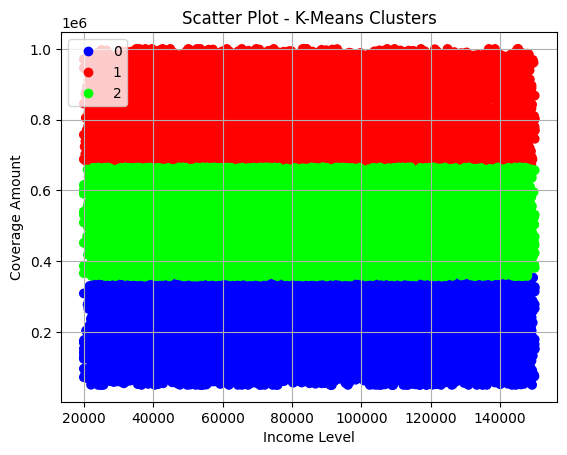

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique cluster labels
cluster_labels = list(data_subset_kmcluster['cluster_number'].unique())

# Create a scatter plot
scatter_plot = plt.scatter(x='Income Level', y='Coverage Amount', data=data_subset_kmcluster, c='cluster_number', cmap='brg')

# Add legend
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)

# Set labels and title
plt.xlabel('Income Level')
plt.ylabel('Coverage Amount')
plt.title('Scatter Plot - K-Means Clusters')

# Show grid
plt.grid()

# Show the plot
plt.show()


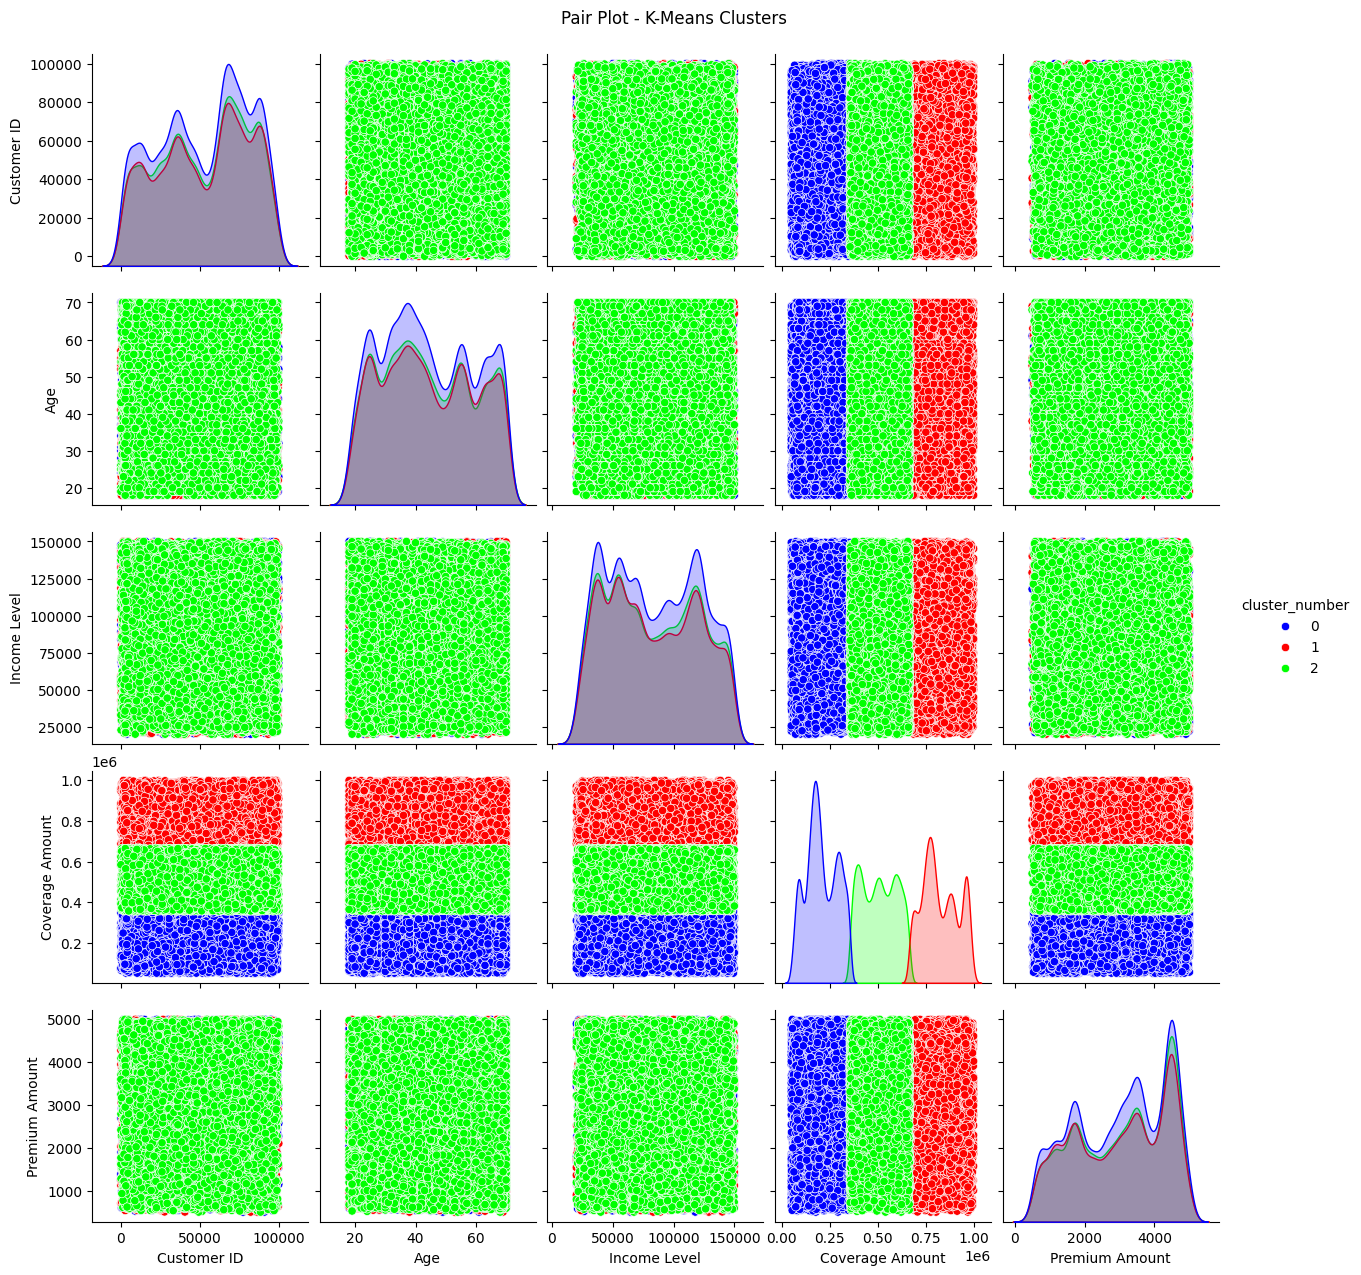

In [95]:
import seaborn as sns
import pandas as pd

# Assuming 'data_subset_kmcluster' is your DataFrame
# Get unique cluster labels
cluster_labels = data_subset_kmcluster['cluster_number'].unique()

# Create pair plot
pair_plot = sns.pairplot(data_subset_kmcluster, hue='cluster_number', palette='brg')

# Update legend
for i, label in enumerate(cluster_labels):
    pair_plot._legend.texts[i].set_text(label)

# Set title
pair_plot.fig.suptitle('Pair Plot - K-Means Clusters', y=1.02)

# Show the plot
plt.show()


In [96]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define a list of categorical features
categorical_features = ['Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Behavioral Data', 'Interactions with Customer Service', 'Insurance Products Owned', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Segmentation Group']

# Iterate over each cluster
for cluster_label in data_subset_kmcluster['cluster_number'].unique():
    # Subset the dataframe for the current cluster
    cluster_data = data_subset_kmcluster[data_subset_kmcluster['cluster_number'] == cluster_label]

    # Initialize a dictionary to store contingency tables for each feature
    contingency_tables = {}

    # Create contingency tables for each categorical feature
    for feature in categorical_features:
        contingency_table = pd.crosstab(cluster_data[feature], cluster_data['cluster_number'])
        contingency_tables[feature] = contingency_table

    # Perform Chi-Square test of independence for each feature
    for feature, contingency_table in contingency_tables.items():
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Cluster {cluster_label}: Chi-Square test for {feature}: p-value = {p}")


Cluster 0: Chi-Square test for Gender: p-value = 1.0
Cluster 0: Chi-Square test for Marital Status: p-value = 1.0
Cluster 0: Chi-Square test for Education Level: p-value = 1.0
Cluster 0: Chi-Square test for Geographic Information: p-value = 1.0
Cluster 0: Chi-Square test for Occupation: p-value = 1.0
Cluster 0: Chi-Square test for Behavioral Data: p-value = 1.0
Cluster 0: Chi-Square test for Interactions with Customer Service: p-value = 1.0
Cluster 0: Chi-Square test for Insurance Products Owned: p-value = 1.0
Cluster 0: Chi-Square test for Policy Type: p-value = 1.0
Cluster 0: Chi-Square test for Customer Preferences: p-value = 1.0
Cluster 0: Chi-Square test for Preferred Communication Channel: p-value = 1.0
Cluster 0: Chi-Square test for Preferred Contact Time: p-value = 1.0
Cluster 0: Chi-Square test for Preferred Language: p-value = 1.0
Cluster 0: Chi-Square test for Segmentation Group: p-value = 1.0
Cluster 1: Chi-Square test for Gender: p-value = 1.0
Cluster 1: Chi-Square test fo

In [97]:
from scipy.stats import f_oneway

# Define a list of numerical features
numerical_features = ['Income Level', 'Coverage Amount', 'Premium Amount']

# Initialize a dictionary to store data for each cluster
cluster_data = {}

# Iterate over each cluster
for cluster_label in data_subset_kmcluster['cluster_number'].unique():
    # Subset the dataframe for the current cluster
    cluster_data[cluster_label] = {}
    cluster_subset = data_subset_kmcluster[data_subset_kmcluster['cluster_number'] == cluster_label]

    # Store numerical data for the current cluster
    for feature in numerical_features:
        cluster_data[cluster_label][feature] = cluster_subset[feature]

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    data = [cluster_data[cluster_label][feature] for cluster_label in cluster_data.keys()]
    f_statistic, p_value = f_oneway(*data)
    print(f"ANOVA for {feature}: F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA for Income Level: F-statistic = 4.20154531857899, p-value = 0.014977362405324428
ANOVA for Coverage Amount: F-statistic = 228551.00895916153, p-value = 0.0
ANOVA for Premium Amount: F-statistic = 5.28710676899608, p-value = 0.005059010629717937
